C:\Users\HP\AppData\Local\Temp\ipykernel_5712\3466758218.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_distance_attrition['Attrition'] = corr_distance_attrition['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


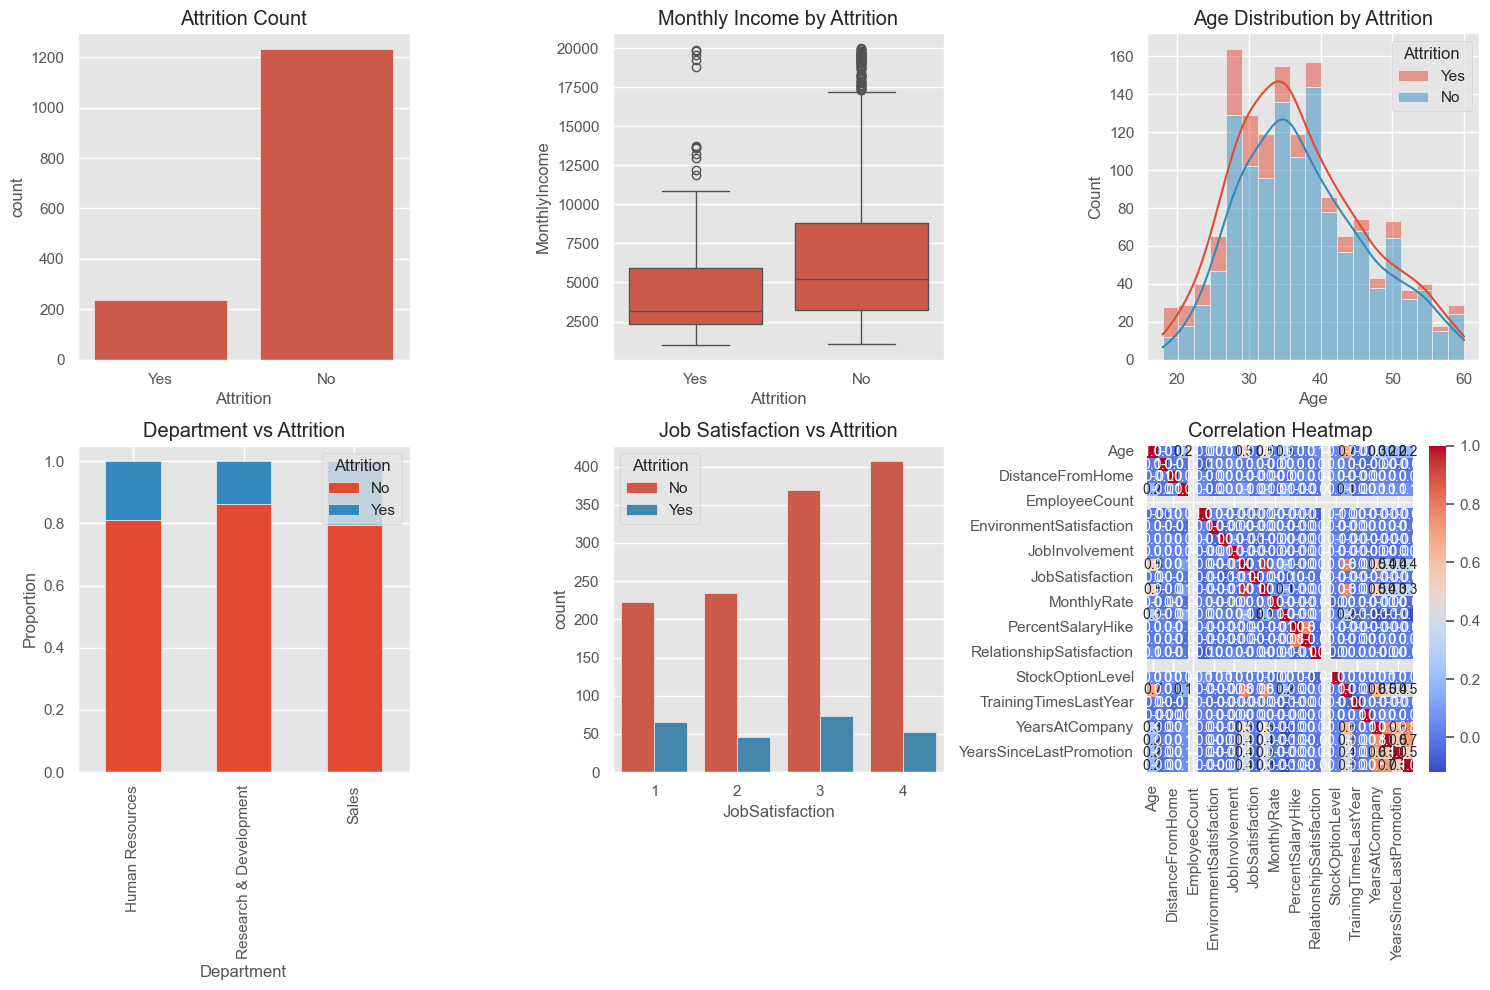

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔍 Logistic Regression Evaluation:
Accuracy: 0.8605442176870748
Confusion Matrix:
 [[250   5]
 [ 36   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.38      0.08      0.13        39

    accuracy                           0.86       294
   macro avg       0.62      0.53      0.53       294
weighted avg       0.81      0.86      0.82       294


🔍 Random Forest Evaluation:
Accuracy: 0.8673469387755102
Confusion Matrix:
 [[251   4]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



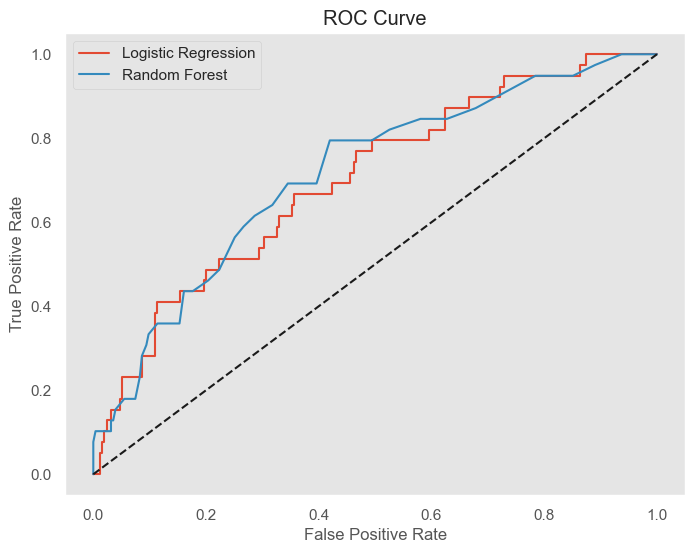

In [6]:
# 🔹 Employee Attrition Prediction - Full Project Code 🔹

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 📊 PART 1: EDA Answers

# Q1: Total employees & how many left
total_employees = df.shape[0]
left_employees = df[df['Attrition'] == 'Yes'].shape[0]

# Q2: Average age - stayed vs left
avg_age_left = df[df['Attrition'] == 'Yes']['Age'].mean()
avg_age_stayed = df[df['Attrition'] == 'No']['Age'].mean()

# Q3: Attrition rate by department
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Q4: Correlation: DistanceFromHome vs Attrition
corr_distance_attrition = df[['DistanceFromHome', 'Attrition']]
corr_distance_attrition['Attrition'] = corr_distance_attrition['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
corr_val = corr_distance_attrition.corr().iloc[0, 1]

# Q5: Overtime vs Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index')

# Q6: MonthlyIncome vs Attrition
avg_income_left = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
avg_income_stayed = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()

# Q7: Missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

# 🖼️ PART 2: Visualizations

plt.figure(figsize=(15,10))

# 1. Bar chart: Attrition count
plt.subplot(2,3,1)
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')

# 2. Boxplot: MonthlyIncome vs Attrition
plt.subplot(2,3,2)
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition')

# 3. Histogram: Age vs Attrition
plt.subplot(2,3,3)
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack')
plt.title('Age Distribution by Attrition')

# 4. Stacked bar chart: Department vs Attrition
plt.subplot(2,3,4)
dept_attr = pd.crosstab(df['Department'], df['Attrition'], normalize='index')
dept_attr.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Department vs Attrition')
plt.ylabel('Proportion')

# 5. Countplot: JobSatisfaction by Attrition
plt.subplot(2,3,5)
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Job Satisfaction vs Attrition')

# 6. Heatmap
plt.subplot(2,3,6)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# 🧠 PART 3: Model Training

# Label encoding
df_encoded = df.copy()
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate both
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ROC Curve for both
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
